In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from sklearn.datasets import make_blobs

In [60]:
# Create datasets for kmeans
X, y = make_blobs(n_samples=1000, centers=1, n_features=2)

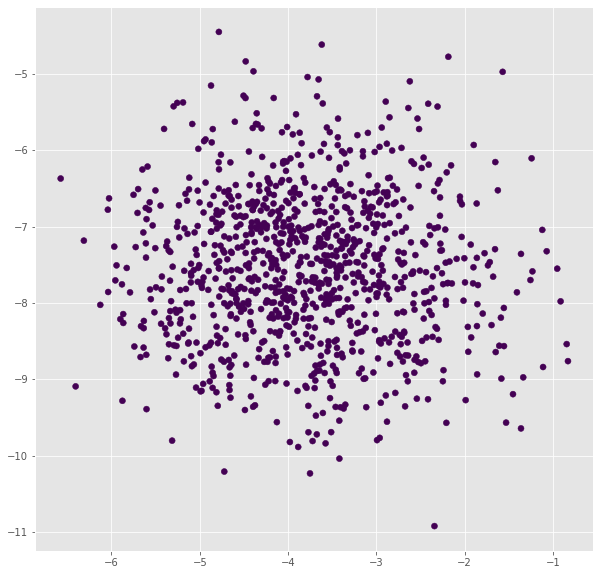

In [61]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [68]:
# Define kmeans class
class KMeans:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self, data):
        # Step 1: Initialize centroids
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []

            # Step 2: Assign data points to centroids
            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            # Step 3: Update centroids
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid) / original_centroid * 100.0) > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [69]:
clf = KMeans()
clf.fit(X)

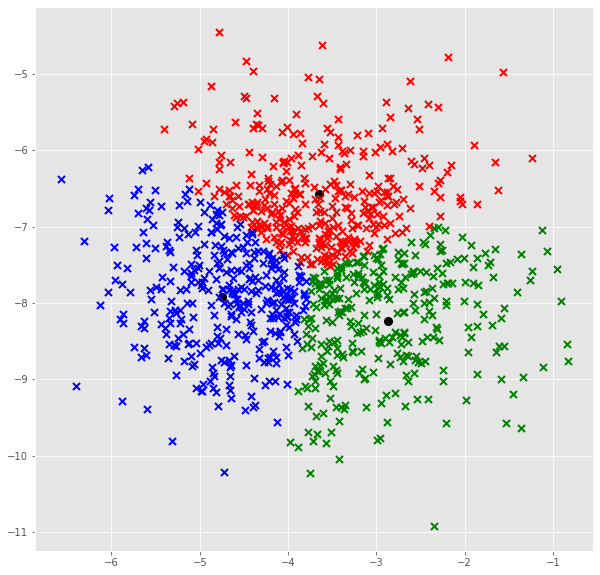

In [70]:
colors = 10 * ['r', 'g', 'b', 'c', 'k', 'y', 'm']

fig, ax = plt.subplots(figsize=(10, 10))
for centroid in clf.centroids:
    ax.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker='o', color='k', s=50, linewidths=2)
for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        ax.scatter(featureset[0], featureset[1], marker='x', color=color, s=50, linewidths=2)

plt.show()